### 任务：
1. 基于examdata.csv数据，建立逻辑回归模型
2. 预测Exam1 = 75, Exam2 = 60时，该同学在Exam3是 passed or failed;
3. 建立二阶边界，提高模型准确度

### 评估指标：
accuracy score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data_path = './datasets/03/exam_data.csv'

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
data = np.array(data)
X = data[:, :2]
y = data[:, 2]

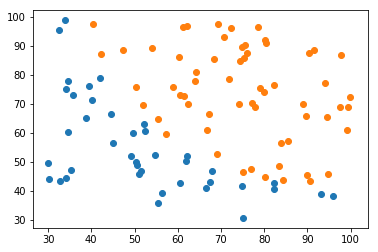

In [7]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(75, 2)

(75,)

(25, 2)

(25,)

### 任务 1

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_reg = LogisticRegression()

In [12]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
log_reg.score(X_test, y_test)

0.88

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_predict = log_reg.predict(X_test)

In [16]:
accuracy_score(y_test, y_predict)

0.88

### 任务 2

In [17]:
X_target = np.array([75, 60]).reshape(1, -1)

In [18]:
y_target = log_reg.predict(X_target)

In [19]:
y_target

array([1.])

### 任务 3

In [27]:
theta_0 = log_reg.intercept_[0]
theta_1, theta_2 = log_reg.coef_[0, 0], log_reg.coef_[0, 1]
theta_0
theta_1
theta_2

-3.2851324303653815

0.03631878037210437

0.022542983721586307

[-1, 105, -1, 105]

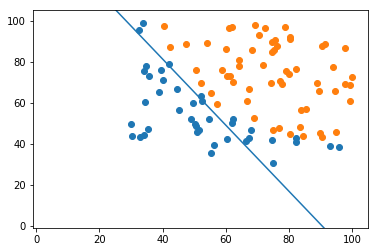

In [33]:
x_value = np.linspace(0, 100, 100)
y_value = [((-theta_0 - theta_1 * x) / theta_2) for x in x_value]
plt.plot(x_value, y_value)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.axis([-1, 105, -1, 105])
plt.show()